# Capstone 1 EDA

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import spatial
import capstone1_funcs as cs1
import seaborn as sns
%matplotlib inline

## Import CSV

In [40]:
init_df = pd.read_csv('/Volumes/b/Galvanize/DS-RFT4/capstones-RFT4/datasets/music2/SpotifyAudioFeaturesApril2019.csv')

In [41]:
init_df.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [42]:
init_df.shape

(130663, 17)

## If there are any duplicate songs, they need to be removed

In [43]:
cs1.drop_duplicates(init_df)

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.1180,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.3710,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.3820,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.6410,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.9280,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,0.006780,0.601,190539,0.801,0.000,11,0.0991,-5.174,1,0.0323,131.049,4,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,0.918000,0.387,194583,0.249,0.000,9,0.1030,-13.233,1,0.0437,94.039,4,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,0.330000,0.717,139191,0.532,0.000,8,0.0997,-8.351,0,0.2060,156.977,4,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,0.007900,0.772,180013,0.510,0.000,4,0.1310,-9.670,0,0.1200,120.049,4,0.0755,50


## The format of duration_ms is a bit hard to read.  Passing DF through a ms to second converter

In [44]:
cs1.time_ms_to_sec(init_df)

### There is now a new time_seconds column which is easier to interpret

In [45]:
init_df.head()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.005820,0.743,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),214,0.024400,0.846,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.025000,0.603,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,125,0.029400,0.800,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,124,0.000035,0.783,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [46]:
init_df.shape

(130663, 17)

## Check the data for any NaN values

In [47]:
cols_list = ['track_id', 'track_name', 'time_seconds', 'acousticness', 'danceability', 
             'energy', 'instrumentalness', 'key', 'liveness', 
             'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 
             'valence', 'popularity']

In [48]:
cs1.check_for_nans(init_df, cols_list)

NaNs in track_id: 0
NaNs in track_name: 0
NaNs in time_seconds: 0
NaNs in acousticness: 0
NaNs in danceability: 0
NaNs in energy: 0
NaNs in instrumentalness: 0
NaNs in key: 0
NaNs in liveness: 0
NaNs in loudness: 0
NaNs in mode: 0
NaNs in speechiness: 0
NaNs in tempo: 0
NaNs in time_signature: 0
NaNs in valence: 0
NaNs in popularity: 0


# Drop specific columns

### I will drop the 'instrumentalness, speechiness, time_signature, key, and mode columns

In [49]:
cols_to_drop = ['instrumentalness', 'speechiness', 'time_signature', 'key', 'mode']

In [50]:
cs1.drop_columns(init_df, cols_to_drop)

There are a good amount of one's in the popularity column.  I decided to remove them.  Hard to believe that even the worst song would receive such a low score

In [51]:
mask_above_0 = init_df['popularity'] >2
mask_0 = init_df['popularity'] < 2

In [52]:
df = init_df.copy()[mask_above_0]
df_0 = init_df.copy()[mask_0]

In [53]:
df_0.shape

(22106, 12)

In [54]:
df

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",238,0.00582,0.743,0.339,0.0812,-7.678,203.927,0.1180,15
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,138,0.02500,0.603,0.723,0.0824,-5.890,114.966,0.3820,56
41,Mr Little Jeans,3Z78Hd9B1OndIo7XJajwYR,Forgetter,254,0.12500,0.821,0.512,0.0879,-7.138,128.035,0.5430,28
42,Orjan Nilsen,16UKw34UY9w40Vc7TOkPpA,Nothing Here But Love,189,0.04480,0.574,0.881,0.0756,-2.150,126.131,0.5510,29
45,Burbank,7AgDITo8BVDoh2bXj2psYA,Waiting for U,168,0.83200,0.699,0.309,0.1160,-10.790,79.991,0.4220,31
...,...,...,...,...,...,...,...,...,...,...,...,...
130658,Calum Scott,0cvfSKcm9VeduwyYPrxtLx,Come Back Home,190,0.00678,0.601,0.801,0.0991,-5.174,131.049,0.2890,57
130659,Saint Claire,43MP9F7UzvfilSrw2SqZGJ,Enough for You,194,0.91800,0.387,0.249,0.1030,-13.233,94.039,0.3460,60
130660,Mike Stud,4TWlUuFk81NGUNKwndyS5Q,Do It,139,0.33000,0.717,0.532,0.0997,-8.351,156.977,0.5460,47
130661,D Savage,5iGBXzOoRo4sBTy8wdzMyK,No Smoke,180,0.00790,0.772,0.510,0.1310,-9.670,120.049,0.0755,50


## Gain a general understanding of the data and how it's distributed

In [55]:
sns.set_palette('Blues_r', n_colors=9)

In [56]:
attribute_list = ['time_seconds', 'acousticness', 'danceability', 
                  'energy', 'liveness', 'loudness', 'tempo', 
                  'valence', 'popularity']

''

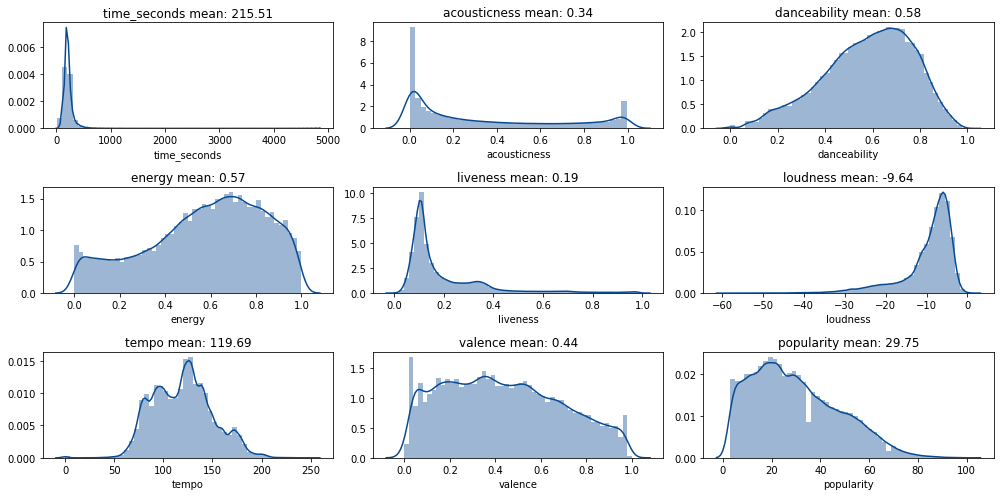

In [57]:
fig, axs = plt.subplots(3,3, figsize=(14,7))
for ax, att in zip(axs.flatten(), attribute_list):
    cs1.plot_hist_and_means(ax, df, att)
fig.tight_layout()
plt.savefig(f'attribute_dists.png', format='png') 
;

## I wanted to examine the relationship between a few of the attributes through the use of a scatter matrix

''

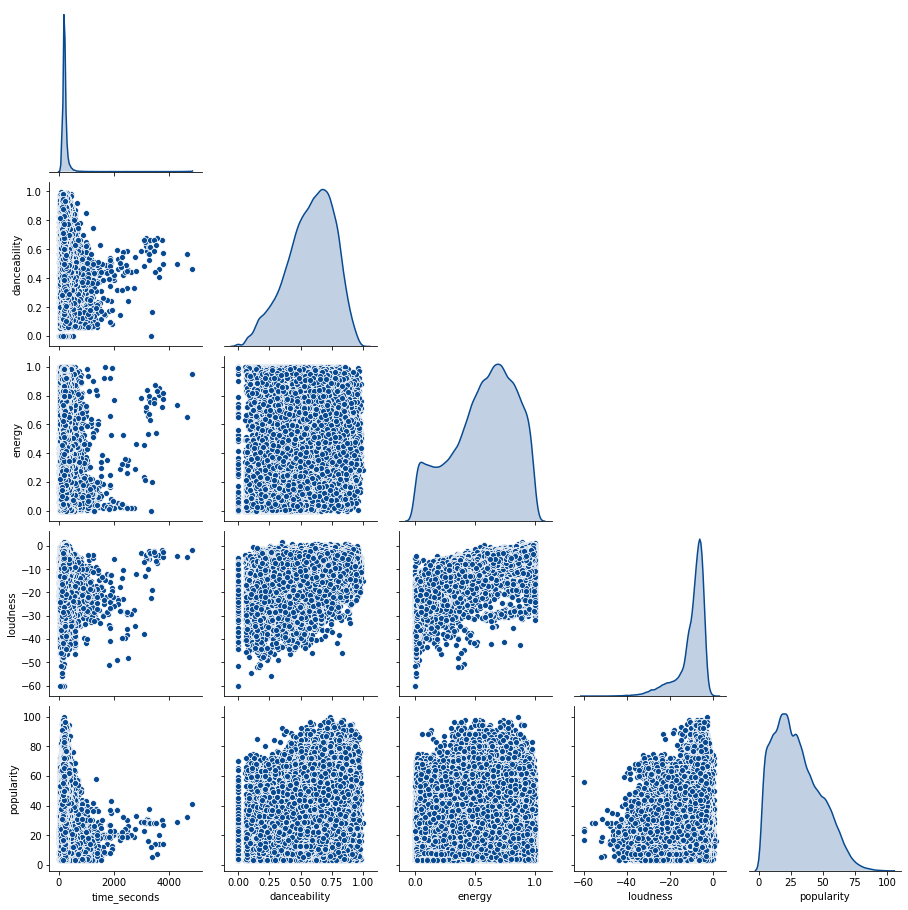

In [58]:
attributes = ['time_seconds', 'danceability', 'energy', 'loudness', 'popularity']
sns.pairplot(df[attributes], diag_kind="kde", corner=True)
plt.savefig(f'scatter_matrix.png', format='png')
;

## Group together songs by similar popularity rating.

## The songs were grouped into 8 groups.

##### Out of the 106,040 total songs in the dataframe, I decided that the top 0.1% of these could be classified as the most popular of the dataset with a popularity over 86.  The remaining songs were distrubuted fairly evenly between the remaining 7 groups.

In [59]:
popularity = df.copy().sort_values('popularity', ascending=False)

In [60]:
popularity.tail()

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
100453,Sushin Shyam,39Y9HLrqt5NDNtBxLtFKRL,Mutta Paatu (The Egg Song),221,0.1360,0.767,0.739,0.152,-5.517,134.008,0.959,3
119894,Cedric Gervais,757HmSWk7OZEUA8LU101Vm,Do It Tonight (AIR238),120,0.0185,0.537,0.971,0.117,-3.636,127.945,0.233,3
112535,Johann Sebastian Bach,2PrLmcL5GW9l1mPo9zCbbG,"Auf, auf! Die rechte Zeit ist hier, BWV 440",88,0.9250,0.367,0.249,0.127,-12.245,89.171,0.205,3
21837,ABC,3ewkw3uTTBRpSUaqJlyPDa,A dorso d'asino,220,0.4370,0.569,0.445,0.132,-12.545,126.849,0.513,3
60596,Luis y Julian,7DZAIR8ZaYzUA2PwRGQhyb,Condena Dictada,210,0.5860,0.472,0.472,0.052,-2.700,182.855,0.797,3


In [61]:
df.shape

(106040, 12)

## Create masks to separate popularity into new dfs.  Separated as follows:
- Greater than 86
- Between 52 and 87
- Between 41 and 52
- Between 33 and 41
- Between 26 and 33
- Between 20 and 26
- Between 14 and 20
- Between 7 and 14
- Between 1 and 7

Besides the greater than 87 group, each group holds around 13,000 songs now.  This will make it easier to analyze later.

### Create masks for each new group

In [62]:
mask_86 = popularity['popularity'] > 86
mask_52 = (popularity['popularity'] > 52) & (popularity['popularity'] <= 86)
mask_41 = (popularity['popularity'] > 41) & (popularity['popularity'] <= 52)
mask_33 = (popularity['popularity'] > 33) & (popularity['popularity'] <= 41)
mask_26 = (popularity['popularity'] > 26) & (popularity['popularity'] <= 33)
mask_20 = (popularity['popularity'] > 20) & (popularity['popularity'] <= 26)
mask_14 = (popularity['popularity'] > 14) & (popularity['popularity'] <= 20)
mask_7 = (popularity['popularity'] > 7) & (popularity['popularity'] <= 14)
mask_1 = (popularity['popularity'] > 1) & (popularity['popularity'] <= 7)

mask_below_86 = (popularity['popularity'] <= 86) & (popularity['popularity'] > 1)



### Apply masks to create new dataframes to work with

In [63]:
df_86 = popularity[mask_86]
df_52 = popularity[mask_52]
df_41 = popularity[mask_41]
df_33 = popularity[mask_33]
df_26 = popularity[mask_26]
df_20 = popularity[mask_20]
df_14 = popularity[mask_14]
df_7 = popularity[mask_7]
df_1 = popularity[mask_1]

df_below_86 = popularity[mask_below_86]



### mask_86 is about 0.13% of the total data

In [64]:
f'{round(((len(df_86) / len(df)) * 100), 3)} %'

'0.13 %'

### New dataframe totals and percents of total data

In [65]:
df_lst = [df_86, df_52, df_41, df_33, df_26, df_20, df_14, df_7, df_1]
df_name_lst = ['df_86', 'df_52', 'df_41', 'df_33', 'df_26', 'df_20', 'df_14', 'df_7', 'df_1']

for df_, name in zip(df_lst, df_name_lst):
    print(f'{name}: \t Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 106040)*100, 2)}%\n')

df_86: 	 Songs:138 
	 Percent:0.13%

df_52: 	 Songs:13680 
	 Percent:12.9%

df_41: 	 Songs:13267 
	 Percent:12.51%

df_33: 	 Songs:12794 
	 Percent:12.07%

df_26: 	 Songs:14363 
	 Percent:13.54%

df_20: 	 Songs:13562 
	 Percent:12.79%

df_14: 	 Songs:14268 
	 Percent:13.46%

df_7: 	 Songs:14447 
	 Percent:13.62%

df_1: 	 Songs:9521 
	 Percent:8.98%



## Compare distributions from each df across all attributes

#### Time, Acousticness, Danceability, Energy, Liveness, Loudness, Tempo, and Valence

### Time

REMOVE X LABELS ON AX [0][1]
Think about changing color scheme
Change legend marker size

''

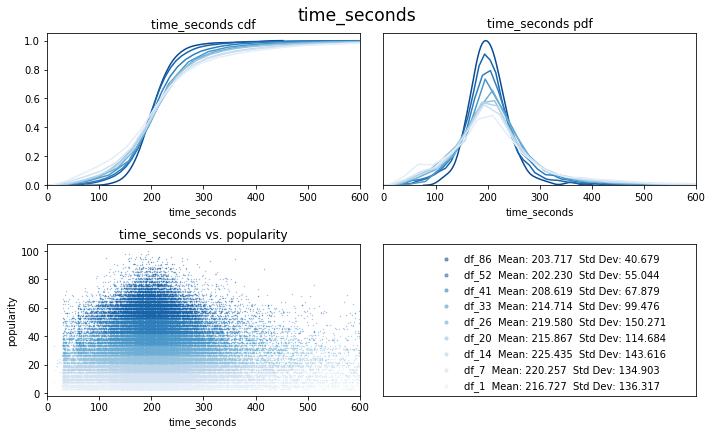

In [66]:
attribute = 'time_seconds'
against = 'popularity'
low, high = 0, 600
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png') 
;


### Acousticness

''

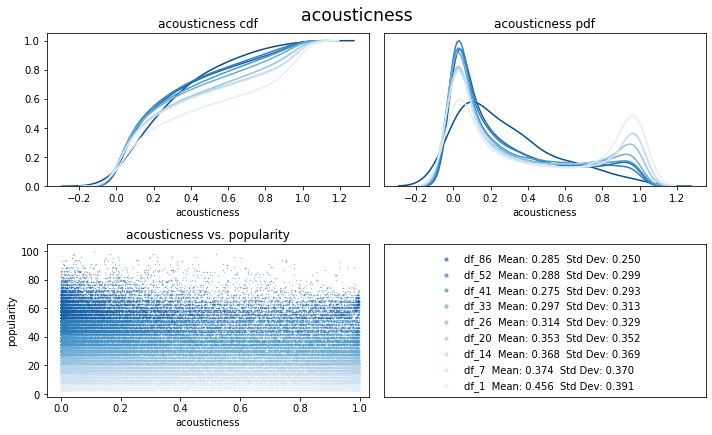

In [67]:
attribute = 'acousticness'
against = 'popularity'
low, high = None, None
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png')
;


### Danceability

''

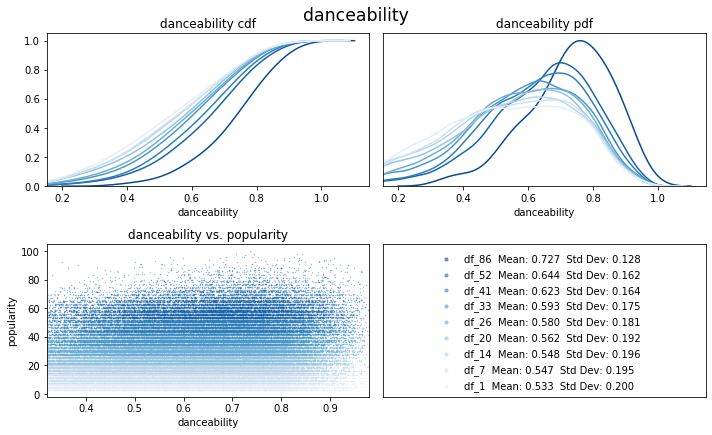

In [68]:
attribute = 'danceability'
against = 'popularity'
low, high = None, None
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png')   
;


### Energy

''

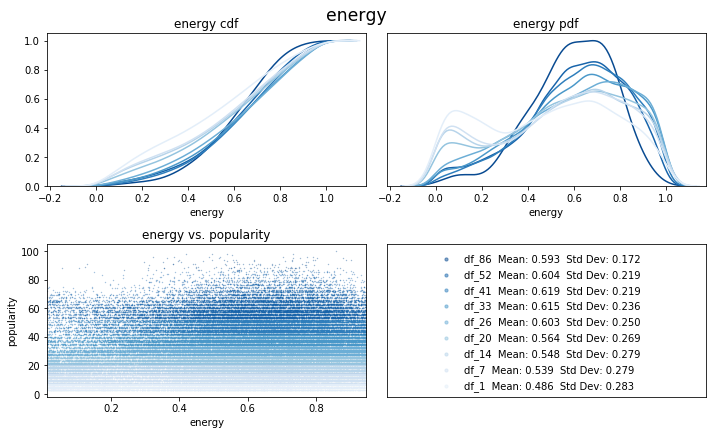

In [69]:
attribute = 'energy'
against = 'popularity'
low, high = None, None
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png')  
;


### Liveness

''

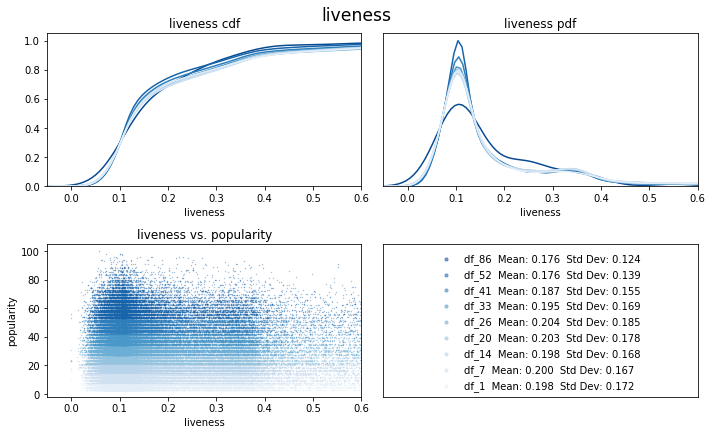

In [70]:
attribute = 'liveness'
against = 'popularity'
low, high = -0.05, 0.6
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png')  
;


### Loudness

''

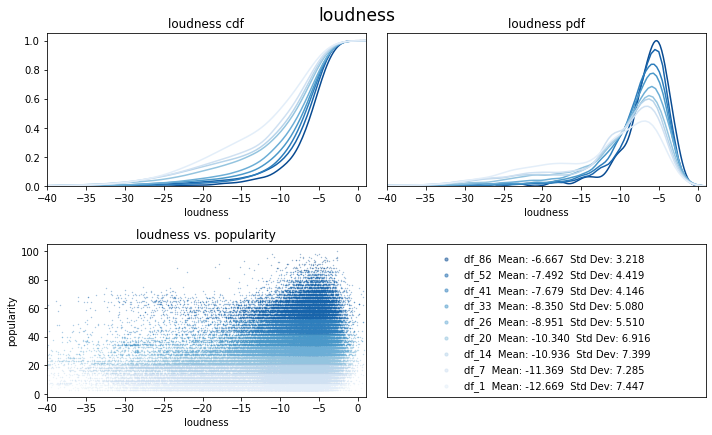

In [71]:
attribute = 'loudness'
against = 'popularity'
low, high = -40, 1
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png') 
;


### Tempo

''

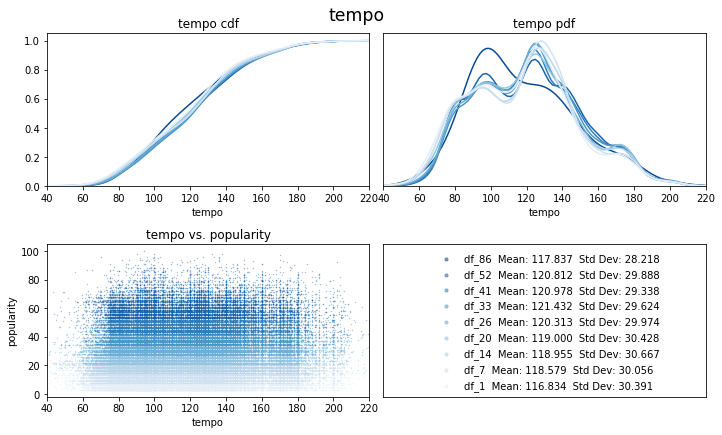

In [72]:
attribute = 'tempo'
against = 'popularity'
low, high = 40, 220
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png') 
;


### Valence

''

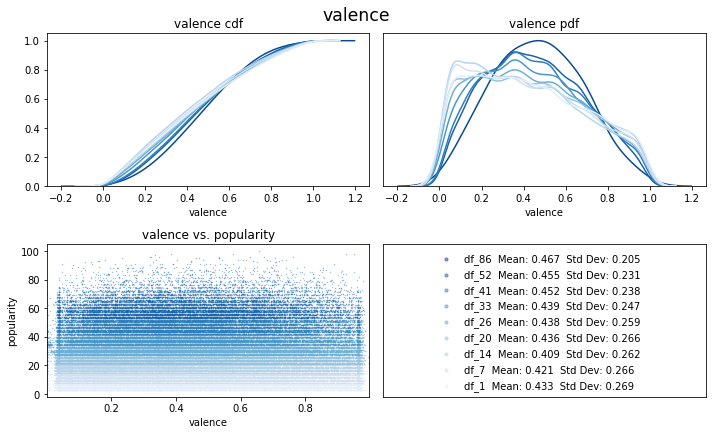

In [73]:
attribute = 'valence'
against = 'popularity'
low, high = None, None
fs = (10,6)

cs1.master_plotter(df_lst, df_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
plt.savefig(f'{attribute}.png', format='png')    
;


### Spearman Correlation tests.  Song attributes against popularity

In [74]:
dataset = df
against = 'popularity'
corr_list = ['time_seconds', 'acousticness', 'danceability', 
            'energy', 'liveness', 'loudness', 'tempo', 'valence']

for att in corr_list:
    cs1.spearman_correlation(dataset, att, against) 

time_seconds and popularity have a correlation of -0.009, with a p-value of 5.598e-03
acousticness and popularity have a correlation of -0.099, with a p-value of 1.229e-228
danceability and popularity have a correlation of 0.183, with a p-value of 0.000e+00
energy and popularity have a correlation of 0.123, with a p-value of 0.000e+00
liveness and popularity have a correlation of -0.024, with a p-value of 4.102e-15
loudness and popularity have a correlation of 0.263, with a p-value of 0.000e+00
tempo and popularity have a correlation of 0.038, with a p-value of 2.186e-35
valence and popularity have a correlation of 0.056, with a p-value of 2.658e-73


# Conclusion
## How different attributes relate to the popularity of a song given the sample of 106,040 songs

- Loudness-
    - Correlation of 0.263, with a p-value of 0.0. 
    - As a song gets louder than its popularity will go up.
- Danceability-
    - Correlation of 0.183, with a p-value of 0.0. 
    - As a song's danceability value increases than its popularity will go up.
- Energy- 
    - Correlation of 0.123, with a p-value of 0.0. 
    - As a song's energy increases than its popularity will go up.
- Valence- 
    - Correlation of 0.056, with a p-value of 2.658326249179174e-73. 
    - As a song's valence increases than its popularity will go up.  
- Tempo- 
    - Correlation of 0.038, with a p-value of 2.185627825374629e-35. 
    - As a song's tempo increases than its popularity will go up.
- Time- 
    - Correlation of -0.009, with a p-value of 0.0055977699952641236. 
    - As a song's length increases than its popularity will go down.
- Liveness- 
    - Correlation of -0.024, with a p-value of 4.101749967807702e-15. 
    - As a song's sense of liveness increases than its popularity will go down.
- Acousticness- 
    - Correlation of -0.099, with a p-value of 1.2290236449990221e-228. 
    - As a song's acousticness value increases than its popularity will go down.

Even though there is a correlation between popularity and every attribute, the practical significance of most of these are hardly important. The correlation between loudness and popularity is the most interesting to me.  I am also interested in the time aspect of a song.  I know that people have a short attention span, and was assuming I would see more of a correlation between popularity increasing as a song's length was shorter.

''

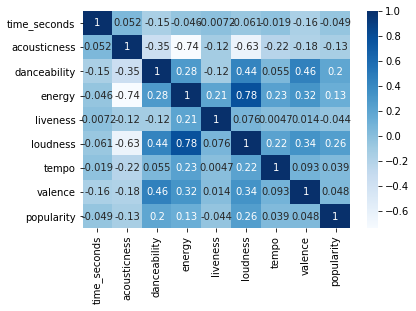

In [75]:
corr_list = ['time_seconds', 'acousticness', 'danceability', 
            'energy', 'liveness', 'loudness', 'tempo', 'valence', 'popularity']

cs1.plot_correlations(df, corr_list)
plt.savefig(f'{attribute}.png', format='png')

;

''

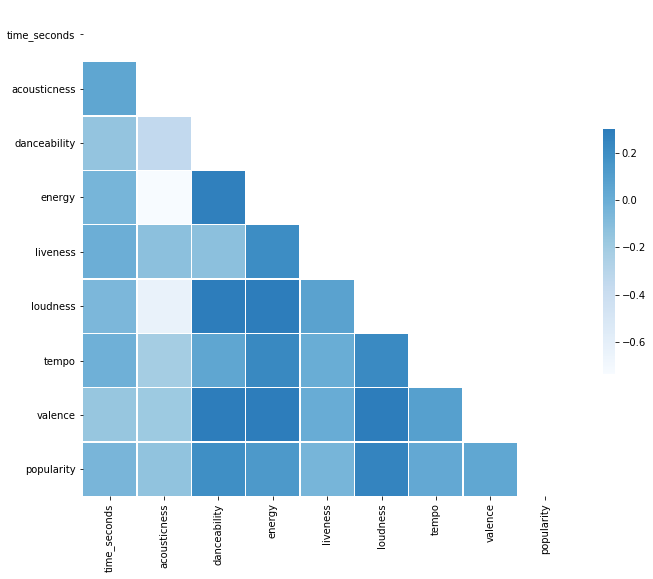

In [76]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
fig, ax = plt.subplots(figsize=(11, 9))

sns.heatmap(corr, mask=mask, cmap='Blues', vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.savefig(f'attribute_heat_map.png', format='png')

;

### Let's explore loudness further.  I am curious how danceability and energy relate to loudness.

''

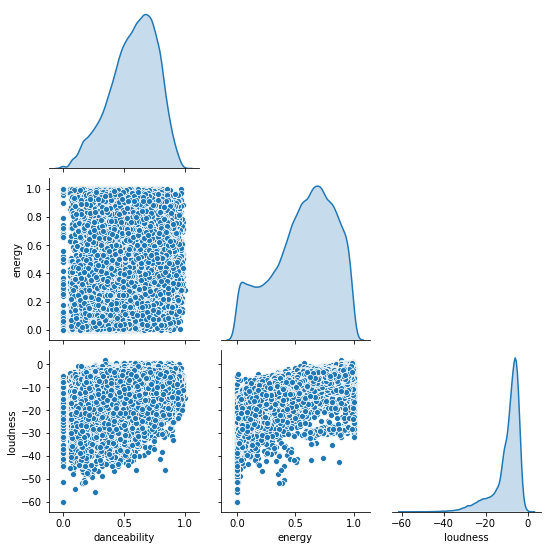

In [116]:
attributes = ['danceability', 'energy', 'loudness']
sns.pairplot(df[attributes], diag_kind="kde", corner=True)
# plt.savefig(f'scatter_matrix.png', format='png')
;

In [168]:
loudness = df.copy().sort_values('loudness', ascending=False)

In [169]:
loudness

,artist_name,track_id,track_name,time_seconds,acousticness,danceability,energy,liveness,loudness,tempo,valence,popularity
24318,araabMUZIK,7C2CdEAO8IkQSDqQr3ErKn,Bass,182,0.044900,0.347,0.892,0.9010,1.806,81.580,0.435,16
23640,araabMUZIK,5d8xflcaLXjJVElSEKEJSy,Lalalala,246,0.210000,0.354,0.997,0.5940,1.187,98.522,0.409,15
69314,Mefjus,4unRu4ammv55BfFen5KkSv,Together,284,0.001480,0.433,0.973,0.1070,0.738,171.973,0.146,31
40710,Subtronics,3E5IBYXIlLaegcOWzd4CXu,Thermal Expansion,212,0.066000,0.857,0.978,0.1080,0.681,145.031,0.389,28
91637,Jarvis,6AwbfviKqXyAgMt50VNDBL,Ready 2 Party,232,0.000327,0.642,0.960,0.0526,0.679,150.002,0.716,13
...,...,...,...,...,...,...,...,...,...,...,...,...
50315,Old Bike,1yPXig0m7bQIQ8UixN8lOJ,Khaki Pants,196,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,24
55558,Old Bike,3R4lLd6cPNhwKQvcI30hhp,This Is Me,116,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,24
58914,Old Bike,5I9f40X50PyLIEvKlN1tyo,Naked,171,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,23
55557,Old Bike,5IOoDlyOTBGClrDRO8aZuw,All Falls Down,132,0.000000,0.000,0.000,0.0000,-60.000,0.000,0.000,23


In [426]:
lmask_0 = loudness['loudness'] > -0.7
lmask_5 = (loudness['loudness'] > -5.05) & (loudness['loudness'] <= -0.7)
lmask_7 = (loudness['loudness'] > -6.7) & (loudness['loudness'] <= -5.05)
lmask_9 = (loudness['loudness'] > -8.8) & (loudness['loudness'] <= -6.7)
lmask_13 = (loudness['loudness'] > -12.5) & (loudness['loudness'] <= -8.8)
lmask_35 = (loudness['loudness'] > -35) & (loudness['loudness'] <= -12.5)
# lmask_60 = (loudness['loudness'] > -60) & (loudness['loudness'] <= -35)


In [427]:
ldf_0 = loudness[lmask_0]
ldf_5 = loudness[lmask_5]
ldf_7 = loudness[lmask_7]
ldf_9 = loudness[lmask_9]
ldf_13 = loudness[lmask_13]
ldf_35 = loudness[lmask_35]
# ldf_60 = loudness[lmask_60]

In [428]:
ldf_lst = [ldf_0, ldf_5, ldf_7, ldf_9, ldf_13, ldf_35]
ldf_name_lst = ['ldf_0', 'ldf_5', 'ldf_7', 'ldf_9', 'lmask_13', 'ldf_35']

In [429]:
for df_, name in zip(ldf_lst, ldf_name_lst):
    print(f'{name}: Songs:{df_.shape[0]} \n\t Percent:{round((len(df_) / 106040)*100, 2)}%\n')

ldf_0: Songs:133 
	 Percent:0.13%

ldf_5: Songs:20226 
	 Percent:19.07%

ldf_7: Songs:21243 
	 Percent:20.03%

ldf_9: Songs:21831 
	 Percent:20.59%

lmask_13: Songs:20894 
	 Percent:19.7%

ldf_35: Songs:21150 
	 Percent:19.95%



### Energy

energy and loudness have a correlation of 0.771, with a p-value of 0.000e+00


''

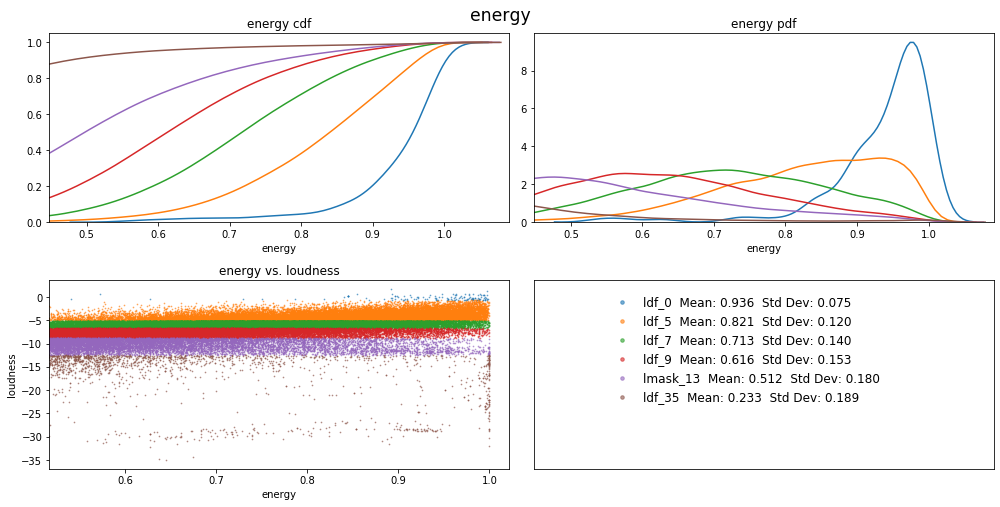

In [433]:
attribute = 'energy'
against = 'loudness'
low, high = None, None
fs = (14,7)

cs1.master_plotter(ldf_lst, ldf_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
cs1.spearman_correlation(df, attribute, against)
;

### Danceability

danceability and loudness have a correlation of 0.289, with a p-value of 0.000e+00


''

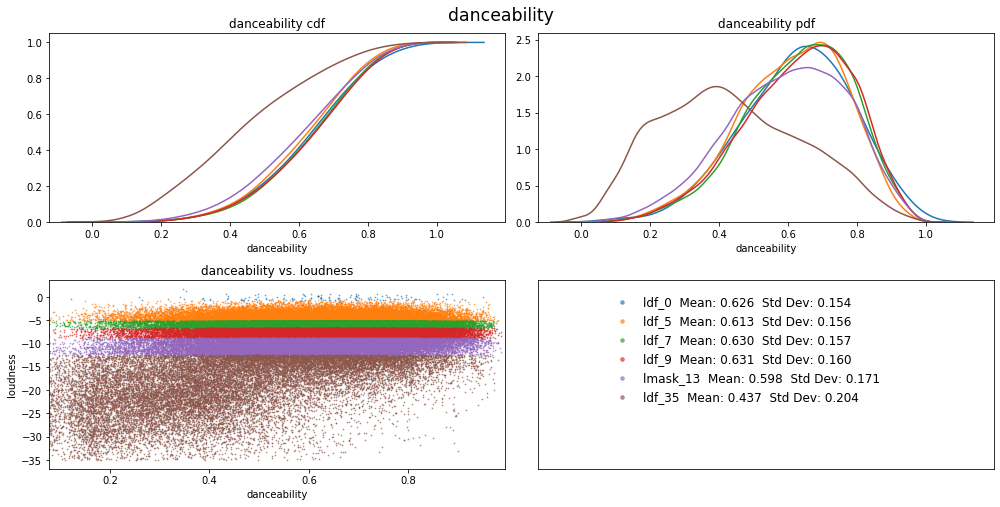

In [434]:
attribute = 'danceability'
against = 'loudness'
low, high = None, None
fs = (14,7)

cs1.master_plotter(ldf_lst, ldf_name_lst, attribute, against, low, high, fs)
plt.suptitle(attribute, fontsize='xx-large', y=1)
cs1.spearman_correlation(df, attribute, against)
;